In [2]:
import matplotlib.pyplot as plt
import numpy as np

import os
import sys
import torch
import time

sys.path.insert(0,os.path.abspath('/notebooks/4901_revisit_cdtran'))
sys.path.insert(0,os.path.abspath('/notebooks/pytorchtimseries'))
from tqdm.notebook import tqdm


def xy_plot(x, y, pred_y, title=None, y_label=None):
    with plt.style.context(['science', 'notebook']):

        fig, ax = plt.subplots()
        
        x_ticks = np.arange(len(x))
        y_ticks = np.arange(len(x), len(x)+len(y))
        
        # 设置边框粗度
        for spine in ax.spines.values():
            spine.set_linewidth(2)  # 设置边框粗度为2

        
        ax.plot(x_ticks, x, label='lookback', linewidth=3)
        ax.plot(y_ticks, y, label='ground_truth', linewidth=3)
        ax.plot(y_ticks, pred_y, label='prediction', linewidth=3)
    if y_label: plt.ylabel(y_label)
    if title: plt.title(title)
    plt.legend()


## PEMS07

### DLinear

train steps: 19649
val steps: 5633
test steps: 2813


/root/anaconda3/envs/testpyt/lib/python3.8/site-packages/torch/__init__.py:955: UserWarning: torch.set_default_tensor_type() is deprecated as of PyTorch 2.1, please use torch.set_default_dtype() and torch.set_default_device() as alternatives. (Triggered internally at ../torch/csrc/tensor/python_tensor.cpp:432.)
  _C._set_default_tensor_type(t)
/notebooks/pytorchtimseries/torch_timeseries/experiments/forecast.py:378: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless the

resuming from /notebooks/4901_revisit_cdtran/results/runs/DLinear/PEMS07/w96h1s12/5a648c9e98547d7fbe0a27de6f836f8c/run_checkpoint.pth


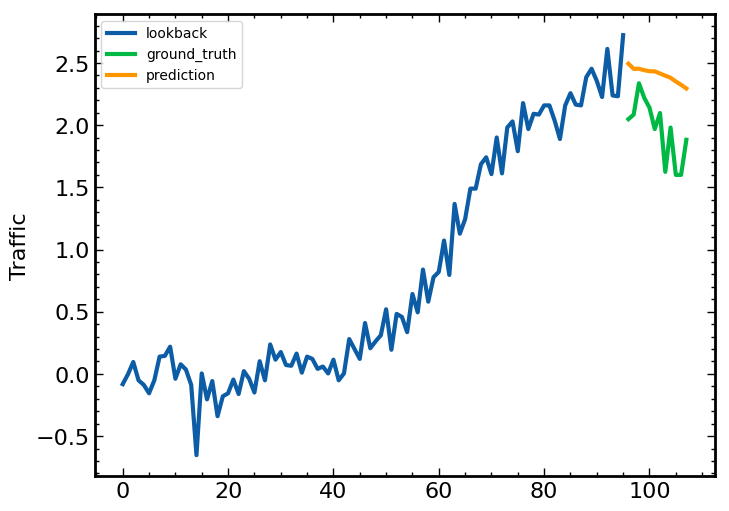

In [3]:
dataset= "PEMS07"

from src.experiments.shortterm import DLinearForecast

exp = DLinearForecast(dataset_type=dataset, windows=96, pred_len=12, data_path='/notebooks/pytorchtimseries/data', save_dir='/notebooks/4901_revisit_cdtran/results', device='cuda:0')
exp._setup_run(1)
exp._resume_run(1)

# i = 10 # usable v=0
i = 1020
b = 0
v = 580 #b500

batch_x, batch_y, origin_x, origin_y, batch_x_date_enc, batch_y_date_enc = map(lambda x: torch.tensor(x).to(exp.device).unsqueeze(0).float(),  exp.dataloader.test_loader.dataset[i])
pred_y, true_y  = exp._process_one_batch(batch_x, batch_y, batch_x_date_enc, batch_y_date_enc)



plot_x = batch_x[b, :, v].cpu().detach().numpy()
plot_y = batch_y[b, :, v].cpu().detach().numpy()
plot_pred_y = pred_y[b, :, v].cpu().detach().numpy()


x_ticks = np.arange(len(plot_x))
y_ticks = np.arange(len(plot_x), len(plot_x)+len(plot_y))


pred_y, true_y  = exp._process_one_batch(batch_x, batch_y, batch_x_date_enc, batch_y_date_enc)
plot_pred_y = pred_y[b, :, v].cpu().detach().numpy()
xy_plot(plot_x, plot_y, plot_pred_y, None, 'Traffic')

plt.show()

### PatchTST

train steps: 19649
val steps: 5633
test steps: 2813
resuming from /notebooks/4901_revisit_cdtran/results/runs/PatchTST/PEMS07/w96h1s12/7b880cdcfbf9f06e14ec3c7790cfcdf0/run_checkpoint.pth


/notebooks/pytorchtimseries/torch_timeseries/experiments/forecast.py:378: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  check_point = torch.load(run_checkpoint_filepath, map

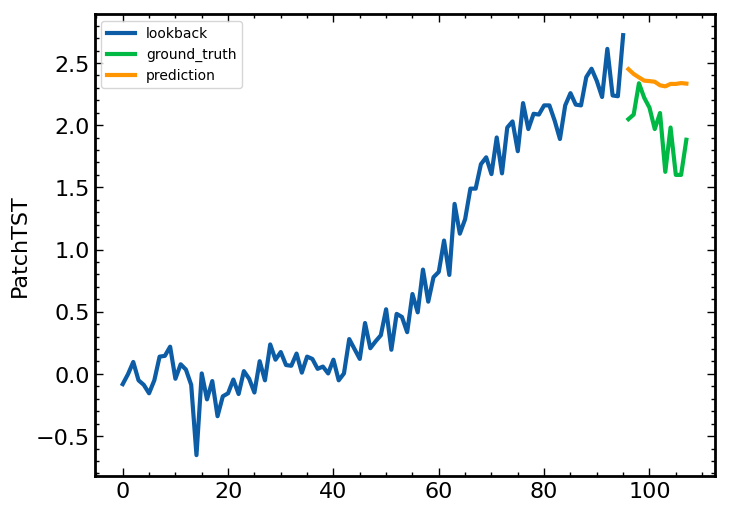

In [26]:
from src.experiments.shortterm import PatchTSTForecast

exp = PatchTSTForecast(dataset_type=dataset, windows=96, pred_len=12, data_path='/notebooks/4901_revisit_cdtran/data', save_dir='/notebooks/4901_revisit_cdtran/results', device='cuda:0')
exp._setup_run(1)
exp._resume_run(1)

pred_y, true_y  = exp._process_one_batch(batch_x, batch_y, batch_x_date_enc, batch_y_date_enc)
plot_pred_y = pred_y[b, :, v].cpu().detach().numpy()
xy_plot(plot_x, plot_y, plot_pred_y, None, 'PatchTST')

plt.show()

### CATS

train steps: 19649
val steps: 5633
test steps: 2813
resuming from /notebooks/4901_revisit_cdtran/results/runs/CATS/PEMS07/w96h1s12/1ab734b9923de223a47fafc21880ef8c/run_checkpoint.pth


/notebooks/pytorchtimseries/torch_timeseries/experiments/forecast.py:378: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  check_point = torch.load(run_checkpoint_filepath, map

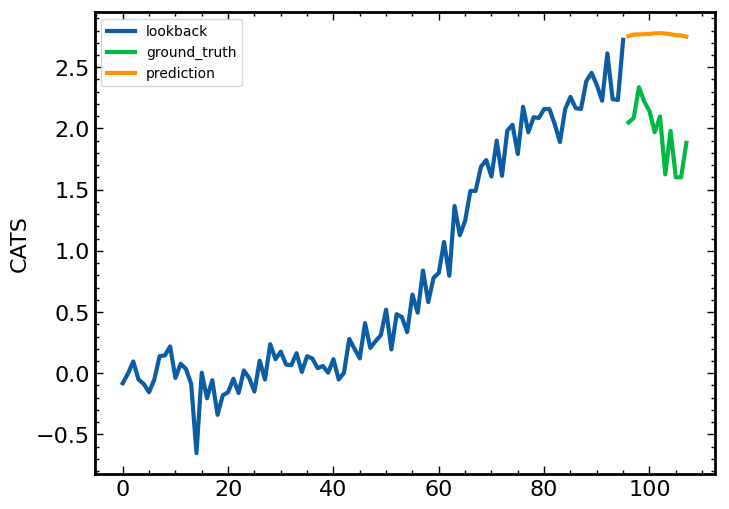

In [31]:
from src.experiments.shortterm import CATSForecast

exp = CATSForecast(dataset_type=dataset, windows=96, pred_len=12, data_path='/notebooks/4901_revisit_cdtran/data', save_dir='/notebooks/4901_revisit_cdtran/results', device='cuda:0')
exp._setup_run(1)
exp._resume_run(1)

pred_y, true_y  = exp._process_one_batch(batch_x, batch_y, batch_x_date_enc, batch_y_date_enc)
plot_pred_y = pred_y[b, :, v].cpu().detach().numpy()
xy_plot(plot_x, plot_y, plot_pred_y, None, 'CATS')

plt.show()

### iTransformer

train steps: 19649
val steps: 5633
test steps: 2813
resuming from /notebooks/4901_revisit_cdtran/results/runs/iTransformer/PEMS07/w96h1s12/45cd1876ac391313a0898089285cc539/run_checkpoint.pth


/notebooks/pytorchtimseries/torch_timeseries/experiments/forecast.py:378: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  check_point = torch.load(run_checkpoint_filepath, map

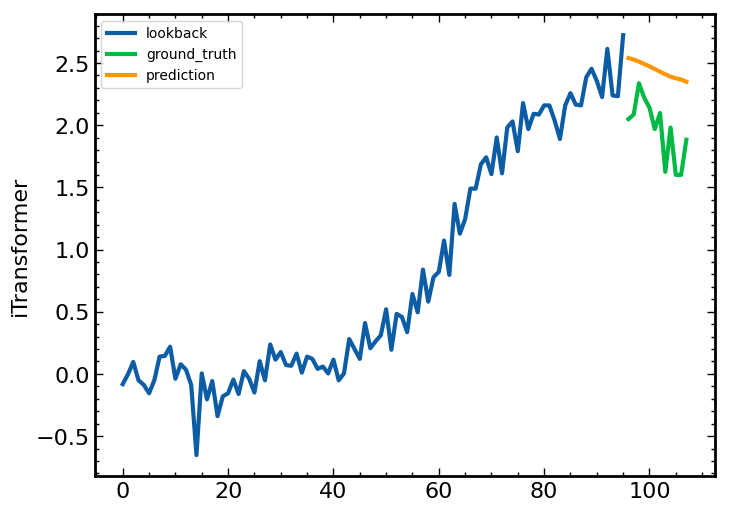

In [32]:
from src.experiments.shortterm import iTransformerForecast

exp = iTransformerForecast(dataset_type=dataset, windows=96, pred_len=12, data_path='/notebooks/4901_revisit_cdtran/data', save_dir='/notebooks/4901_revisit_cdtran/results', device='cuda:0')
exp._setup_run(1)
exp._resume_run(1)

pred_y, true_y  = exp._process_one_batch(batch_x, batch_y, batch_x_date_enc, batch_y_date_enc)
plot_pred_y = pred_y[b, :, v].cpu().detach().numpy()
xy_plot(plot_x, plot_y, plot_pred_y, None, 'iTransformer')

plt.show()

### Crossformer

train steps: 19649
val steps: 5633
test steps: 2813
resuming from /notebooks/4901_revisit_cdtran/results/runs/Crossformer/PEMS07/w96h1s12/e104fa926bf499f810c056d1c630fdc7/run_checkpoint.pth


/notebooks/pytorchtimseries/torch_timeseries/experiments/forecast.py:378: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  check_point = torch.load(run_checkpoint_filepath, map

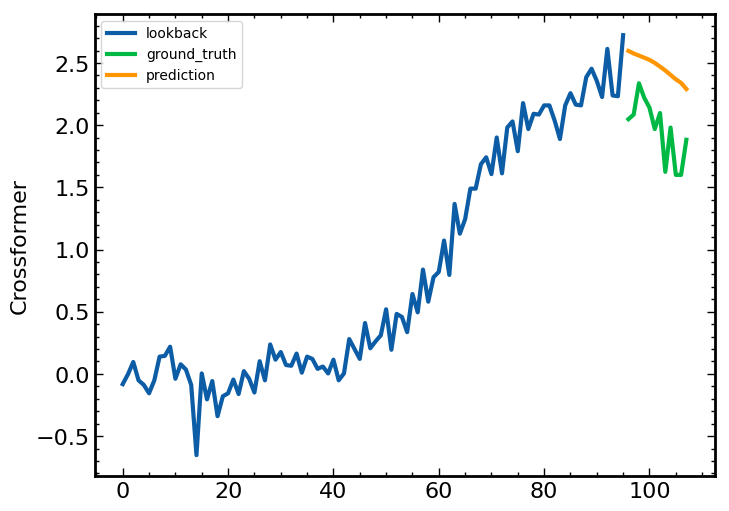

In [33]:
from src.experiments.shortterm import CrossformerForecast

exp = CrossformerForecast(dataset_type=dataset, windows=96, pred_len=12, data_path='/notebooks/4901_revisit_cdtran/data', save_dir='/notebooks/4901_revisit_cdtran/results', device='cuda:0')
exp._setup_run(1)
exp._resume_run(1)

pred_y, true_y  = exp._process_one_batch(batch_x, batch_y, batch_x_date_enc, batch_y_date_enc)
plot_pred_y = pred_y[b, :, v].cpu().detach().numpy()
xy_plot(plot_x, plot_y, plot_pred_y, None, 'Crossformer')

plt.show()

### PAN

train steps: 19649
val steps: 5633
test steps: 2813
tensor([128, 320, 512], dtype=torch.int32)
self.t_index [95, 143]
resuming from /notebooks/4901_revisit_cdtran/results/runs/CiDPG/PEMS07/w96h1s12/8a8baaa19a917ec97615e6bc090c66aa/run_checkpoint.pth


/notebooks/pytorchtimseries/torch_timeseries/experiments/forecast.py:378: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  check_point = torch.load(run_checkpoint_filepath, map

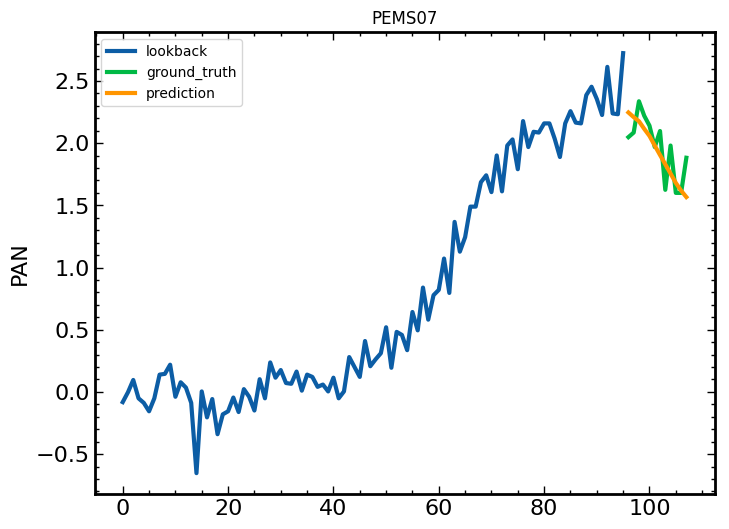

In [28]:
from src.experiments.shortterm import CiDPGForecast

exp = CiDPGForecast(dataset_type=dataset, windows=96, pred_len=12, data_path='/notebooks/4901_revisit_cdtran/data', save_dir='/notebooks/4901_revisit_cdtran/results', device='cuda:0')
exp._setup_run(1)
exp._resume_run(1)

pred_y, true_y  = exp._process_one_batch(batch_x, batch_y, batch_x_date_enc, batch_y_date_enc)
plot_pred_y = pred_y[b, :, v].cpu().detach().numpy()
xy_plot(plot_x, plot_y, plot_pred_y, 'PEMS07', 'PAN')

plt.show()


### TSMixer

train steps: 19649
val steps: 5633
test steps: 2813
resuming from /notebooks/4901_revisit_cdtran/results/runs/TSMixer/PEMS07/w96h1s12/bd9b8ccab6864d3fb91ea7df4dc13a20/run_checkpoint.pth


/notebooks/pytorchtimseries/torch_timeseries/experiments/forecast.py:378: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  check_point = torch.load(run_checkpoint_filepath, map

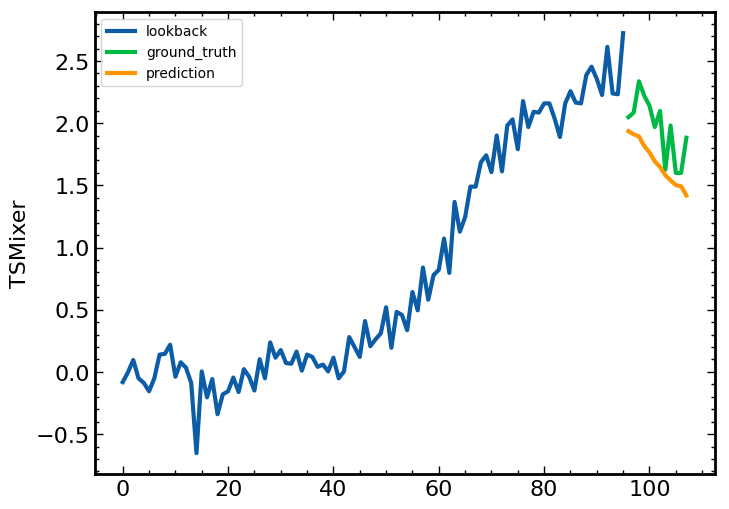

In [10]:
dataset= "PEMS07"

from src.experiments.shortterm import TSMixerForecast

exp = TSMixerForecast(dataset_type=dataset, windows=96, pred_len=12, data_path='/notebooks/pytorchtimseries/data', save_dir='/notebooks/4901_revisit_cdtran/results', device='cuda:0')
exp._setup_run(1)
exp._resume_run(1)

# i = 10 # usable v=0
i = 1020
b = 0
v = 580 #b500

batch_x, batch_y, origin_x, origin_y, batch_x_date_enc, batch_y_date_enc = map(lambda x: torch.tensor(x).to(exp.device).unsqueeze(0).float(),  exp.dataloader.test_loader.dataset[i])
pred_y, true_y  = exp._process_one_batch(batch_x, batch_y, batch_x_date_enc, batch_y_date_enc)



plot_x = batch_x[b, :, v].cpu().detach().numpy()
plot_y = batch_y[b, :, v].cpu().detach().numpy()
plot_pred_y = pred_y[b, :, v].cpu().detach().numpy()


x_ticks = np.arange(len(plot_x))
y_ticks = np.arange(len(plot_x), len(plot_x)+len(plot_y))


pred_y, true_y  = exp._process_one_batch(batch_x, batch_y, batch_x_date_enc, batch_y_date_enc)
plot_pred_y = pred_y[b, :, v].cpu().detach().numpy()
xy_plot(plot_x, plot_y, plot_pred_y, None, 'TSMixer')

plt.show()

### SCINet

train steps: 19649
val steps: 5633
test steps: 2813
resuming from /notebooks/4901_revisit_cdtran/results/runs/SCINet/PEMS07/w96h1s12/d89ce893ec030806f2af9ecfe5ed5e18/run_checkpoint.pth


/notebooks/pytorchtimseries/torch_timeseries/experiments/forecast.py:378: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  check_point = torch.load(run_checkpoint_filepath, map

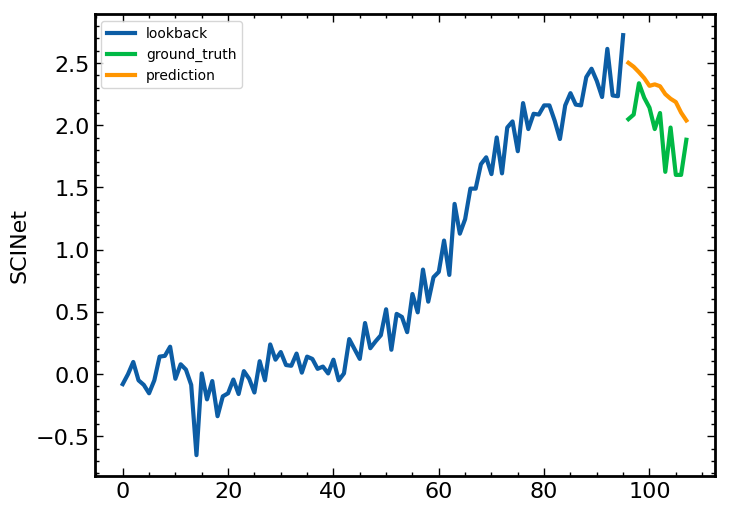

In [8]:
dataset= "PEMS07"

from src.experiments.shortterm import SCINetForecast

exp = SCINetForecast(dataset_type=dataset, windows=96, pred_len=12, data_path='/notebooks/pytorchtimseries/data', save_dir='/notebooks/4901_revisit_cdtran/results', device='cuda:0')
exp._setup_run(1)
exp._resume_run(1)

# i = 10 # usable v=0
i = 1020
b = 0
v = 580 #b500

batch_x, batch_y, origin_x, origin_y, batch_x_date_enc, batch_y_date_enc = map(lambda x: torch.tensor(x).to(exp.device).unsqueeze(0).float(),  exp.dataloader.test_loader.dataset[i])
pred_y, true_y  = exp._process_one_batch(batch_x, batch_y, batch_x_date_enc, batch_y_date_enc)



plot_x = batch_x[b, :, v].cpu().detach().numpy()
plot_y = batch_y[b, :, v].cpu().detach().numpy()
plot_pred_y = pred_y[b, :, v].cpu().detach().numpy()


x_ticks = np.arange(len(plot_x))
y_ticks = np.arange(len(plot_x), len(plot_x)+len(plot_y))


pred_y, true_y  = exp._process_one_batch(batch_x, batch_y, batch_x_date_enc, batch_y_date_enc)
plot_pred_y = pred_y[b, :, v].cpu().detach().numpy()
xy_plot(plot_x, plot_y, plot_pred_y, None, 'SCINet')

plt.show()

## PEMS08

### TSMixer

train steps: 12392
val steps: 3560
test steps: 1775
resuming from /notebooks/4901_revisit_cdtran/results/runs/TSMixer/PEMS08/w96h1s12/6a6539c73e46e27ddc765346200edb51/run_checkpoint.pth


/notebooks/pytorchtimseries/torch_timeseries/experiments/forecast.py:378: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  check_point = torch.load(run_checkpoint_filepath, map

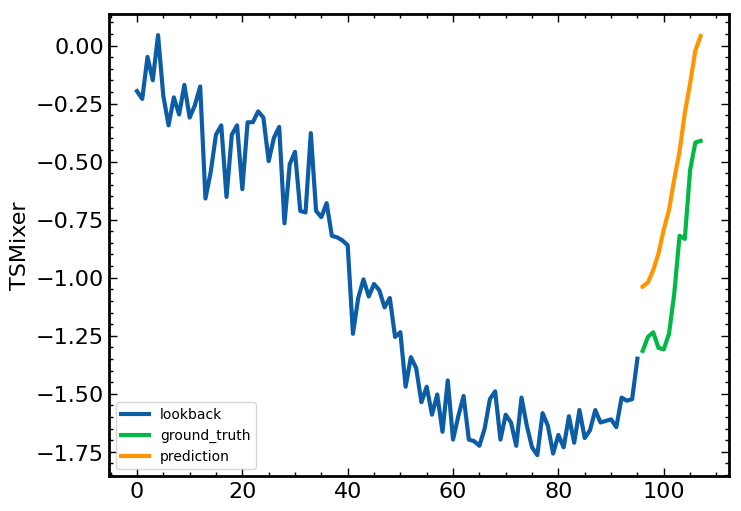

In [14]:
dataset= "PEMS08"

from src.experiments.shortterm import TSMixerForecast

exp = TSMixerForecast(dataset_type=dataset, windows=96, pred_len=12, data_path='/notebooks/4901_revisit_cdtran/data', save_dir='/notebooks/4901_revisit_cdtran/results', device='cuda:0')
exp._setup_run(2)
exp._resume_run(2)

# i = 1000
i = 100
batch_x, batch_y, origin_x, origin_y, batch_x_date_enc, batch_y_date_enc = map(lambda x: torch.tensor(x).to(exp.device).unsqueeze(0).float(),  exp.dataloader.test_loader.dataset[i])
pred_y, true_y  = exp._process_one_batch(batch_x, batch_y, batch_x_date_enc, batch_y_date_enc)


b = 0
# v = 400
v = 0

plot_x = batch_x[b, :, v].cpu().detach().numpy()
plot_y = batch_y[b, :, v].cpu().detach().numpy()
plot_pred_y = pred_y[b, :, v].cpu().detach().numpy()


x_ticks = np.arange(len(plot_x))
y_ticks = np.arange(len(plot_x), len(plot_x)+len(plot_y))


pred_y, true_y  = exp._process_one_batch(batch_x, batch_y, batch_x_date_enc, batch_y_date_enc)
plot_pred_y = pred_y[b, :, v].cpu().detach().numpy()
xy_plot(plot_x, plot_y, plot_pred_y, None, 'TSMixer')

plt.show()

### SCINet

train steps: 12392
val steps: 3560
test steps: 1775
resuming from /notebooks/4901_revisit_cdtran/results/runs/SCINet/PEMS08/w96h1s12/8b4919624078288d6cb65c9f1200f9fd/run_checkpoint.pth


/notebooks/pytorchtimseries/torch_timeseries/experiments/forecast.py:378: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  check_point = torch.load(run_checkpoint_filepath, map

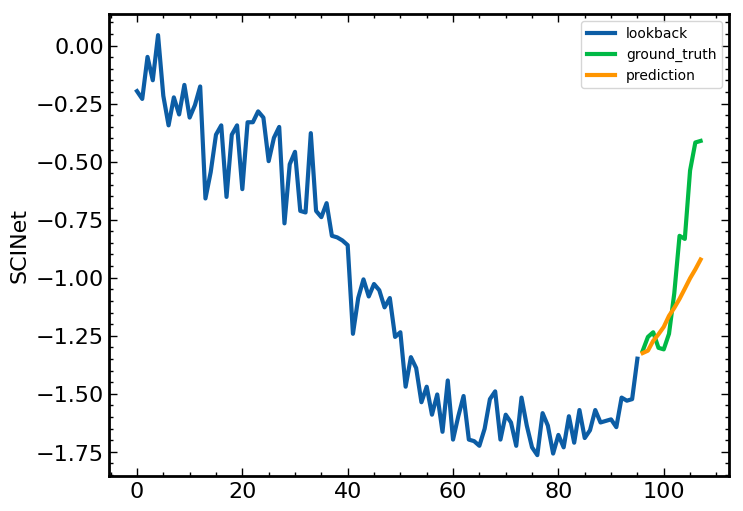

In [12]:
dataset= "PEMS08"

from src.experiments.shortterm import SCINetForecast

exp = SCINetForecast(dataset_type=dataset, windows=96, pred_len=12, data_path='/notebooks/4901_revisit_cdtran/data', save_dir='/notebooks/4901_revisit_cdtran/results', device='cuda:0')
exp._setup_run(2)
exp._resume_run(2)

# i = 1000
i = 100
batch_x, batch_y, origin_x, origin_y, batch_x_date_enc, batch_y_date_enc = map(lambda x: torch.tensor(x).to(exp.device).unsqueeze(0).float(),  exp.dataloader.test_loader.dataset[i])
pred_y, true_y  = exp._process_one_batch(batch_x, batch_y, batch_x_date_enc, batch_y_date_enc)


b = 0
# v = 400
v = 0

plot_x = batch_x[b, :, v].cpu().detach().numpy()
plot_y = batch_y[b, :, v].cpu().detach().numpy()
plot_pred_y = pred_y[b, :, v].cpu().detach().numpy()






pred_y, true_y  = exp._process_one_batch(batch_x, batch_y, batch_x_date_enc, batch_y_date_enc)
plot_pred_y = pred_y[b, :, v].cpu().detach().numpy()
xy_plot(plot_x, plot_y, plot_pred_y, None, 'SCINet')

plt.show()

## Traffic

Using downloaded and verified file: /notebooks/pytorchtimseries/data/traffic/traffic.txt.gz
Extracting /notebooks/pytorchtimseries/data/traffic/traffic.txt.gz to /notebooks/pytorchtimseries/data/traffic
train steps: 11849
val steps: 3413
test steps: 1661
resuming from /notebooks/pytorchtimseries/results/runs/SCINet/Traffic/w336h1s96/9fd0a4168e78bc23c774fbef5caeabb7/run_checkpoint.pth


/notebooks/pytorchtimseries/torch_timeseries/experiments/forecast.py:378: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  check_point = torch.load(run_checkpoint_filepath, map

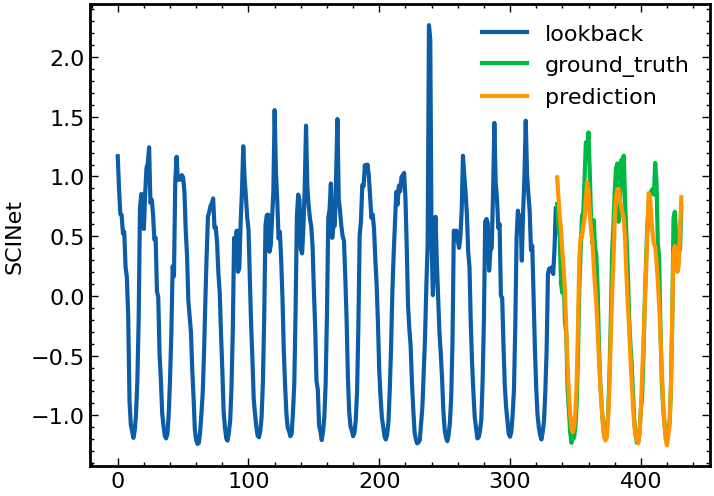

In [32]:
from torch_timeseries.experiments import SCINetForecast
dataset = "Traffic"
exp = SCINetForecast(dataset_type=dataset, windows=336, pred_len=96, data_path='/notebooks/pytorchtimseries/data', save_dir='/notebooks/pytorchtimseries/results', device='cuda:0')
exp._setup_run(2)
exp._resume_run(2)
# i = 1000
i = 5000
batch_x, batch_y, origin_x, origin_y, batch_x_date_enc, batch_y_date_enc = map(lambda x: torch.tensor(x).to(exp.device).unsqueeze(0).float(),  exp.dataloader.test_loader.dataset[i])
pred_y, true_y  = exp._process_one_batch(batch_x, batch_y, batch_x_date_enc, batch_y_date_enc)


b = 0
# v = 400
v = 600

plot_x = batch_x[b, :, v].cpu().detach().numpy()
plot_y = batch_y[b, :, v].cpu().detach().numpy()

plot_pred_y = pred_y[b, :, v].cpu().detach().numpy()

x_ticks = np.arange(len(plot_x))
y_ticks = np.arange(len(plot_x), len(plot_x)+len(plot_y))


xy_plot(plot_x, plot_y,plot_pred_y, None, 'SCINet')
# plt.style.use(['science', 'notebook'])
# plt.plot(x_ticks, plot_x, label='lookback')
# plt.plot(y_ticks, plot_y, label='ground_truth')
# plt.plot(y_ticks, plot_pred_y, label='prediction')

# plt.title(')
# plt.ylabel('TSMixer')
# plt.legend()
plt.show()


## Electricity

### TSMixer

In [34]:
from torch_timeseries.experiments import TSMixerForecast

exp = TSMixerForecast(dataset_type=dataset, windows=336, pred_len=96, data_path='/notebooks/pytorchtimseries/data', save_dir='/notebooks/pytorchtimseries/results', device='cuda:0')
exp._setup_run(1)
exp._resume_run(1)

# i = 1000
i = 6000
batch_x, batch_y, origin_x, origin_y, batch_x_date_enc, batch_y_date_enc = map(lambda x: torch.tensor(x).to(exp.device).unsqueeze(0).float(),  exp.dataloader.test_loader.dataset[i])
pred_y, true_y  = exp._process_one_batch(batch_x, batch_y, batch_x_date_enc, batch_y_date_enc)


b = 0
v = 200
# v = 200

plot_x = batch_x[b, :, v].cpu().detach().numpy()
plot_y = batch_y[b, :, v].cpu().detach().numpy()
plot_pred_y = pred_y[b, :, v].cpu().detach().numpy()


x_ticks = np.arange(len(plot_x))
y_ticks = np.arange(len(plot_x), len(plot_x)+len(plot_y))

xy_plot(plot_x, plot_y,plot_pred_y, None, 'TSMixer')
plt.show()


Using downloaded and verified file: /notebooks/pytorchtimseries/data/traffic/traffic.txt.gz
Extracting /notebooks/pytorchtimseries/data/traffic/traffic.txt.gz to /notebooks/pytorchtimseries/data/traffic
train steps: 11849
val steps: 3413
test steps: 1661
resuming from /notebooks/pytorchtimseries/results/runs/TSMixer/Traffic/w336h1s96/f2ddb1efb41381c0cee4288c6a9055e4/run_checkpoint.pth


In [ ]:
from torch_timeseries.experiments import SCINetForecast

exp = SCINetForecast(dataset_type=dataset, windows=336, pred_len=96, data_path='/notebooks/pytorchtimseries/data', save_dir='/notebooks/pytorchtimseries/results', device='cuda:0')
exp._setup_run(1)
exp._resume_run(1)

# i = 1000
i = 6000
batch_x, batch_y, origin_x, origin_y, batch_x_date_enc, batch_y_date_enc = map(lambda x: torch.tensor(x).to(exp.device).unsqueeze(0).float(),  exp.dataloader.test_loader.dataset[i])
pred_y, true_y  = exp._process_one_batch(batch_x, batch_y, batch_x_date_enc, batch_y_date_enc)


b = 0
v = 200
# v = 200

plot_x = batch_x[b, :, v].cpu().detach().numpy()
plot_y = batch_y[b, :, v].cpu().detach().numpy()
plot_pred_y = pred_y[b, :, v].cpu().detach().numpy()


x_ticks = np.arange(len(plot_x))
y_ticks = np.arange(len(plot_x), len(plot_x)+len(plot_y))

xy_plot(plot_x, plot_y,plot_pred_y, None, 'SCINet')
plt.show()


Using downloaded and verified file: /notebooks/pytorchtimseries/data/traffic/traffic.txt.gz
Extracting /notebooks/pytorchtimseries/data/traffic/traffic.txt.gz to /notebooks/pytorchtimseries/data/traffic
train steps: 11849
val steps: 3413
test steps: 1661
resuming from /notebooks/pytorchtimseries/results/runs/SCINet/Traffic/w336h1s96/61c4d511fca62718551fe739068c675c/run_checkpoint.pth


/notebooks/pytorchtimseries/torch_timeseries/experiments/forecast.py:378: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  check_point = torch.load(run_checkpoint_filepath, map